In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Train data

In [3]:
# loading data
train_df = pd.read_csv('dataset/fraudTrain.csv', index_col=0)

In [3]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_df.shape

(1296675, 22)

In [5]:
train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
# verifying data types and counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [7]:
# checking for missing values
train_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# checking dataset balance
train_df['is_fraud'].value_counts()/train_df.shape[0]

is_fraud
0    0.994211
1    0.005789
Name: count, dtype: float64

C:\Users\pcteste1\AppData\Local\Temp\ipykernel_31608\227285567.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])


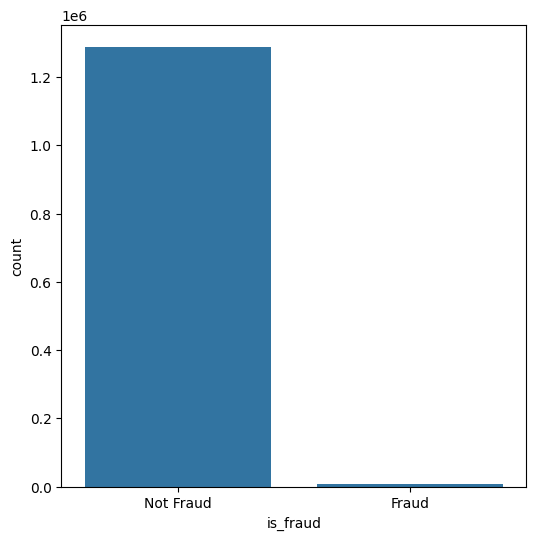

In [9]:
fig = plt.figure(figsize=(6,6))
ax = sns.countplot(data=train_df, x='is_fraud')
ax.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [10]:
# understanding the geographical relationship 
train_df.groupby(['state'])['is_fraud'].value_counts()

state  is_fraud
AK     0            2084
       1              36
AL     0           40774
       1             215
AR     0           30966
                   ...  
WI     1             163
WV     0           25545
       1             146
WY     0           19212
       1             110
Name: count, Length: 101, dtype: int64

In [11]:
# understanding how many categories are there
train_df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [12]:
train_df.groupby(['is_fraud'])['category'].value_counts()

is_fraud  category      
0         gas_transport     131041
          home              122917
          grocery_pos       121895
          shopping_pos      115829
          kids_pets         112796
          shopping_net       95830
          entertainment      93781
          food_dining        91310
          personal_care      90538
          health_fitness     85746
          misc_pos           79405
          misc_net           62372
          grocery_net        45318
          travel             40391
1         grocery_pos         1743
          shopping_net        1713
          misc_net             915
          shopping_pos         843
          gas_transport        618
          misc_pos             250
          kids_pets            239
          entertainment        233
          personal_care        220
          home                 198
          food_dining          151
          grocery_net          134
          health_fitness       133
          travel              

In [13]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
# checking how many distinct merchants are available
len(train_df['merchant'].unique())

693

## Test data

In [4]:
test_df = pd.read_csv('dataset/fraudTest.csv', index_col=0)

In [16]:
test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [17]:
test_df.shape

(555719, 22)

In [18]:
test_df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [20]:
# checking dataset balance
test_df['is_fraud'].value_counts()/test_df.shape[0]

is_fraud
0    0.99614
1    0.00386
Name: count, dtype: float64

In [21]:
test_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Pre-processing data

In [5]:
def split_datetime(df, datetime_col, new_column_name):
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    df[f'{new_column_name}'] = df[datetime_col].astype('int64') // 10**9
    return df

In [6]:
split_datetime(train_df, 'trans_date_trans_time', 'trans_unix_time')
split_datetime(test_df, 'trans_date_trans_time', 'trans_unix_time')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_unix_time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,1592741665
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,1592741673
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,1592741693
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,1592741715
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,1592741717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,1609459147
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,1609459149
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,1609459155
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,1609459164


In [7]:
# removing columns with low significance
remove_columns = ['cc_num', 'first', 'last', 'gender', 'street', 'trans_num', 'job', 'city', 'zip', 
                  'unix_time', 'dob', 'trans_date_trans_time', 'merchant', 'state']

In [8]:
train_df.drop(remove_columns, axis=1, inplace=True)
test_df.drop(remove_columns, axis=1, inplace=True)

In [9]:
train_df = pd.get_dummies(train_df, columns=['category'])
test_df = pd.get_dummies(test_df, columns=['category'])

In [27]:
train_df.shape

(1296675, 22)

In [28]:
test_df.shape

(555719, 22)

In [29]:
train_df.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_unix_time,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,0,1546300818,False,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,1546300844,False,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,1546300851,True,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,0,1546300876,False,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,38.4207,-79.4629,99,38.674999,-78.632459,0,1546300986,False,False,...,False,False,False,False,False,True,False,False,False,False


In [30]:
test_df.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_unix_time,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,1592741665,False,False,...,False,False,False,False,False,False,True,False,False,False
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,1592741673,False,False,...,False,False,False,False,False,False,True,False,False,False
2,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,1592741693,False,False,...,False,True,False,False,False,False,False,False,False,False
3,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,1592741715,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,1592741717,False,False,...,False,False,False,False,False,False,False,False,False,True


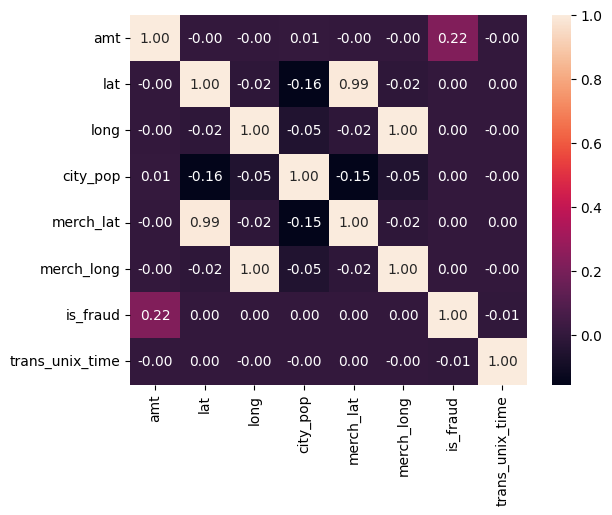

In [31]:
numerical_df = train_df.select_dtypes(include=['int64', 'float64'])
correlation = numerical_df.corr(method='pearson')
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.show()

In [10]:
# splitting train data
#X_train = train_df.drop(['is_fraud'], axis=1)
X_train = train_df[['amt']]
y_train = train_df['is_fraud']

In [11]:
# splitting test data
#X_test = test_df.drop(['is_fraud'], axis=1)
X_test = test_df[['amt']]
y_test = test_df['is_fraud']

## Models

In [12]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### 1.0 Logistic Regression

In [35]:
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
# model performance on training data
lr_model.score(X_train, y_train)

0.9936491410723581

In [37]:
y_pred = lr_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9954941256282401
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.4996757434417079


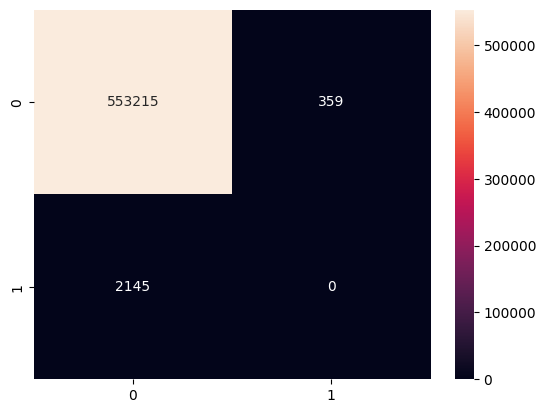

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### 2.0 Decision Trees

In [40]:
tr_model = DecisionTreeClassifier()
tr_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = tr_model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.995112637861941
Precision: 0.3287342531493701
Recall: 0.25547785547785545
F1 Score: 0.28751311647429173
ROC AUC Score: 0.6267282227563961


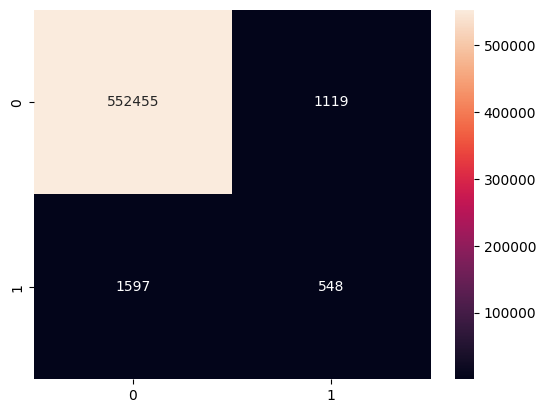

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### 3.0 Random Forest

In [44]:
rf_model = RandomForestClassifier(max_depth=30, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_jobs=-1)

In [45]:
y_pred = rf_model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9953177775098566
Precision: 0.3569192235441453
Recall: 0.26573426573426573
F1 Score: 0.30464991982896844
ROC AUC Score: 0.6319395242727986


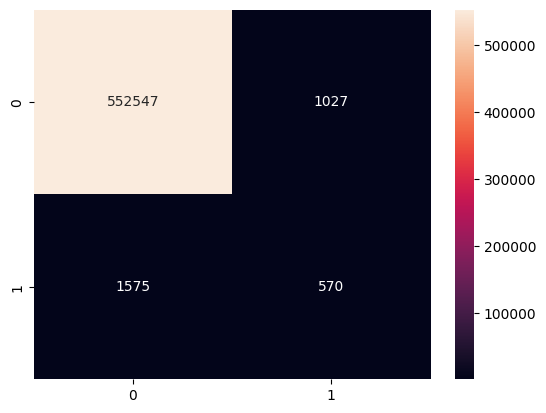

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### 4.0 Gradient Boosting

In [48]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:
y_pred = gb_model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9960375657481569
Precision: 0.4773988897700238
Recall: 0.2806526806526807
F1 Score: 0.3534938344098649
ROC AUC Score: 0.6397311172847958


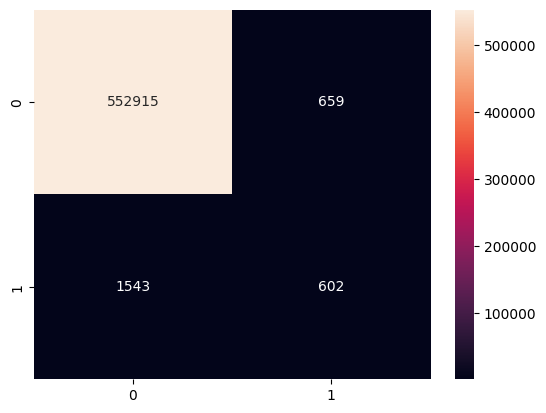

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### 5.0 KNN

In [53]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn_model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9957064631585387
Precision: 0.40444091990483744
Recall: 0.23776223776223776
F1 Score: 0.29947152084556666
ROC AUC Score: 0.6182027994513769


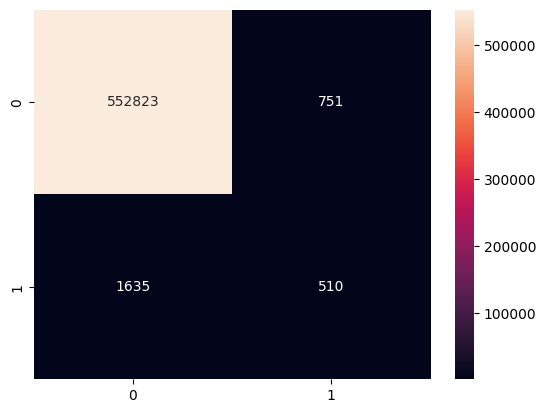

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### 6.0 MLP

In [57]:
mpl_model = MLPClassifier()
mpl_model.fit(X_train, y_train)

MLPClassifier()

In [58]:
y_pred = mpl_model.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

c:\Users\pcteste1\Documents\Gitkraken\CODSOFT\Movie Genre Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9961401355721147
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


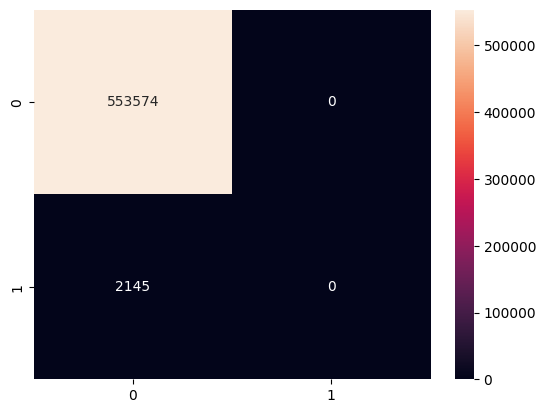

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Grid Search with Gradient Boosting

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = GradientBoostingClassifier()

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=6)

In [75]:
from joblib import dump, load
import os

In [77]:
model_filename = 'models/gradient_boosting_model.joblib'

if os.path.exists(model_filename):
    try:
        # Attempt to load the model
        model = load(model_filename)
        print("Model loaded successfully.")
    except Exception as e:
        # Handle exceptions that occur during model loading
        print(f"Failed to load the model. Error: {e}")
else:
    print(f"Model file {model_filename} does not exist.")
    print("Finding the optimal parameters for the gradient boosting model")
    # Assuming X and y are your feature matrix and target vector
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: ", grid_search.best_score_)

    # Save the model to a file
    dump(grid_search.best_estimator_, model_filename)
    print("Model saved successfully.")

    model = grid_search.best_estimator_

Model loaded successfully.


In [78]:
y_pred = model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9961059456307955
Precision: 0.4915102770330652
Recall: 0.2564102564102564
F1 Score: 0.33700980392156865
ROC AUC Score: 0.6276911951085594


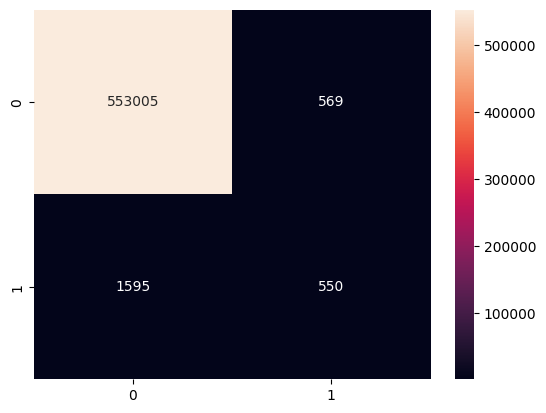

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Analysis

The dataset is heavily imbalanced with over 99% of the available data belonging to the "not fraud" class. This impacted the models' capacity to make predictions for the 'fraud' class. The best model was Gradient Boosting with the following results:

* Accuracy: 0.9960375657481569
* Precision: 0.4773988897700238
* Recall: 0.2806526806526807
* F1 Score: 0.3534938344098649
* ROC AUC Score: 0.6397311172847958

I ran Grid Search Cross Validation (for almost three hours) and obtained the following results:

* Accuracy: 0.9961059456307955
* Precision: 0.4915102770330652
* Recall: 0.2564102564102564
* F1 Score: 0.33700980392156865
* ROC AUC Score: 0.6276911951085594

In [82]:
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
2,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",1,0.994556,0.000060
8,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",2,0.994551,0.000050
5,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",3,0.994550,0.000048
9,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",4,0.994527,0.000036
10,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",5,0.994473,0.000061
1,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",6,0.994430,0.000130
4,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",7,0.994425,0.000119
12,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",8,0.994419,0.000066
7,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",9,0.994418,0.000125
11,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",10,0.994417,0.000052


In [83]:
import numpy as np
from scipy.stats import t

# extracted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py

def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std


def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

In [84]:
model_scores = results_df.filter(regex=r"split\d*_test_score")

In [85]:
model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[1].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1

t_stat, p_val = compute_corrected_ttest(differences, df, len(X_train), len(X_test))
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.139
Corrected p-value: 0.449


It is possible to conlude there is not statistical difference between the second and first models

## Resampling with SMOTE

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [17]:
print(Counter(y_train))

Counter({0: 1289169, 1: 7506})


In [18]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [19]:
print(Counter(y_resampled))

Counter({0: 1289169, 1: 1289169})


In [30]:
results = {}

Training Score:  0.8563981913930602
Test Results:
Accuracy: 0.9527477016261816
Precision: 0.05899780541331383
Recall: 0.751981351981352
F1 Score: 0.10941156520264542
ROC AUC Score: 0.8527534936085555


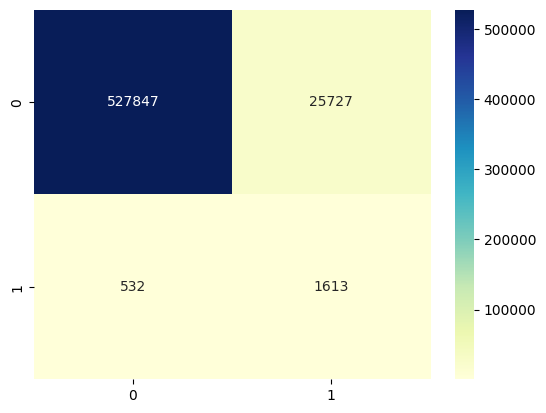

In [40]:
# logistic regression

lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_resampled, y_resampled)
# model performance on training data
print('Training Score: ', lr_model.score(X_resampled, y_resampled))

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Results:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

results['Logistic Regression'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC Score': roc_auc}

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

Training Score:  0.9835894285388495
Test Results:
Accuracy: 0.9732958563590591
Precision: 0.07686154256382907
Recall: 0.5375291375291376
F1 Score: 0.13449200979820367
ROC AUC Score: 0.756256755897635


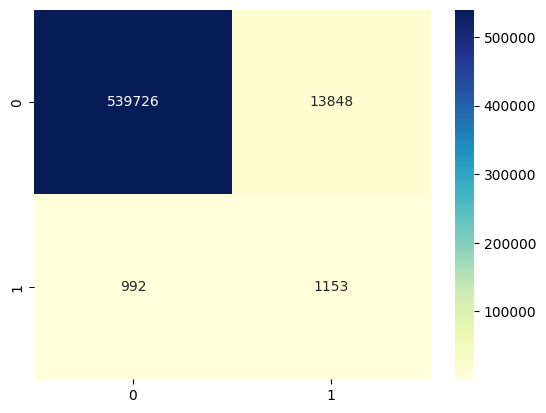

In [41]:
# decision trees

tr_model = DecisionTreeClassifier()
tr_model.fit(X_resampled, y_resampled)

print('Training Score: ', tr_model.score(X_resampled, y_resampled))

y_pred = tr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Results:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

results['Decision Tree'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC Score': roc_auc}

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

Training Score:  0.9691382588318521
Test Results:
Accuracy: 0.9655887237974587
Precision: 0.07478461230214387
Recall: 0.696037296037296
F1 Score: 0.1350581211271428
ROC AUC Score: 0.8313352416447938


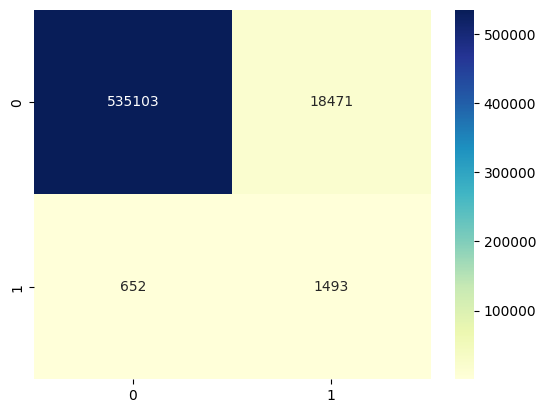

In [42]:
rf_model = RandomForestClassifier(max_depth=30, n_jobs=-1)
rf_model.fit(X_resampled, y_resampled)

print('Training Score: ', rf_model.score(X_resampled, y_resampled))

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Results:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

results['Random Forest'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC Score': roc_auc}

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

Training Score:  0.8934930175950554
Test Results:
Accuracy: 0.914390186407159
Precision: 0.03754224520542367
Recall: 0.8596736596736597
F1 Score: 0.07194272672297759
ROC AUC Score: 0.8871379314059062


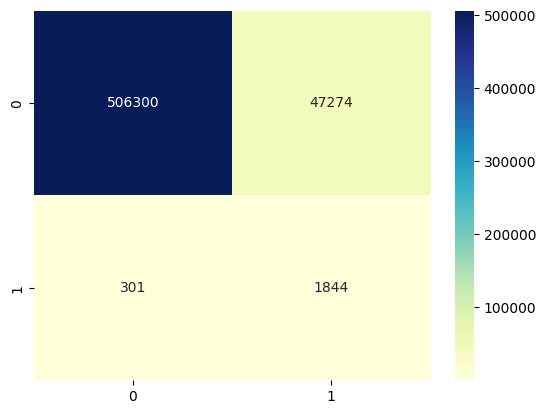

In [31]:
# gradient boosting

gb_model = GradientBoostingClassifier()
gb_model.fit(X_resampled, y_resampled)

print('Training Score: ', gb_model.score(X_resampled, y_resampled))

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Results:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

results['Gradient Boosting'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC Score': roc_auc}

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

Training Score:  0.9578305869905342
Test Results:
Accuracy: 0.977808928613202
Precision: 0.11216020711185563
Recall: 0.6867132867132867
F1 Score: 0.19282628616311034
ROC AUC Score: 0.8328250793742309


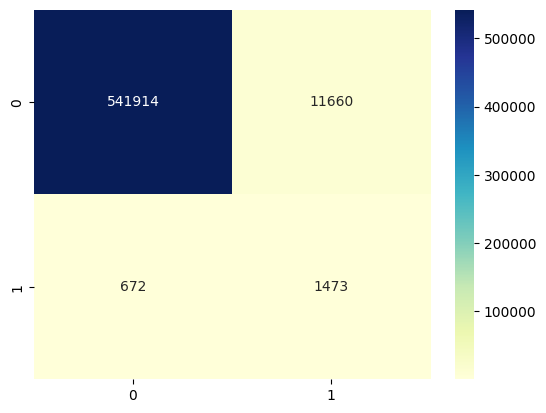

In [34]:
# KNN

knn_model = KNeighborsClassifier()
knn_model.fit(X_resampled, y_resampled)

print('Training Score: ', knn_model.score(X_resampled, y_resampled))

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Results:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

results['KNN'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC Score': roc_auc}

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

Training Score:  0.8899182341492853
Test Results:
Accuracy: 0.9068234125520271
Precision: 0.03477364326553566
Recall: 0.8648018648018648
F1 Score: 0.06685889349432331
ROC AUC Score: 0.8858940516587008


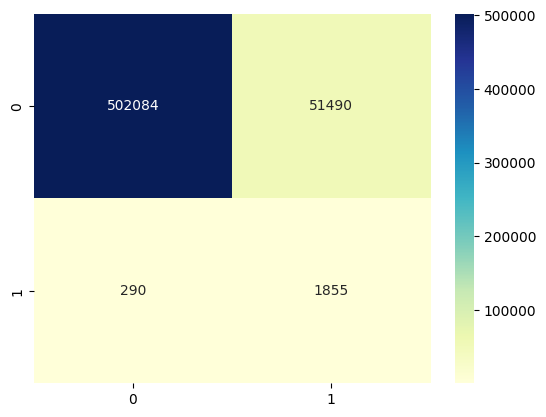

In [35]:
# MLP

mpl_model = MLPClassifier()
mpl_model.fit(X_resampled, y_resampled)

print('Training Score: ', mpl_model.score(X_resampled, y_resampled))

y_pred = mpl_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Results:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

results['MLP'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC Score': roc_auc}

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [43]:
results_df = pd.DataFrame(results)
results_df

,Gradient Boosting,KNN,MLP,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.914390,0.977809,0.906823,0.952748,0.973296,0.965589
Precision,0.037542,0.112160,0.034774,0.058998,0.076862,0.074785
Recall,0.859674,0.686713,0.864802,0.751981,0.537529,0.696037
F1,0.071943,0.192826,0.066859,0.109412,0.134492,0.135058
ROC AUC Score,0.887138,0.832825,0.885894,0.852753,0.756257,0.831335


<Axes: >

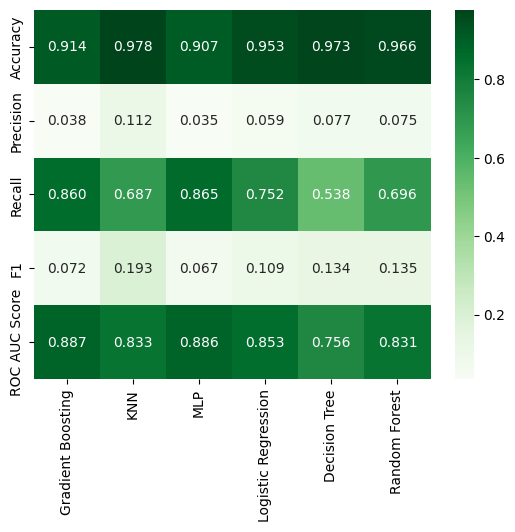

In [45]:
sns.heatmap(results_df, annot=True, fmt='.3f', cmap="Greens")